In [1]:
# 대표값 card_category 활용 결측치 Unkown 대체


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


data = pd.read_csv("./BankChurners_del.csv")


In [2]:

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# 범주형 변수들  INT형태로 변환


from sklearn import preprocessing

def encode_features(dataDf):
    data['Attrition_Flag'] = data['Attrition_Flag'].str[:1]
    data['Gender'] = data['Gender'].str[:1]
#     data['Education_Level'] = data['Education_Level'].str[:3]
#     data['Marital_Status'] = data['Marital_Status'].str[:1]
    data['Card_Category'] = data['Card_Category'].str[:1]
#     data['Income_Category'] = data['Income_Category'].str[:2]
    features = ['Attrition_Flag','Gender','Card_Category'] #,'Education_Level','Marital_Status','Card_Category','Income_Category']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
    return dataDf


data = encode_features(data)


In [4]:
data["Education_Level"].replace({"Unknown":np.nan,
                                "Graduate":0,
                                "Post-Graduate":1,
                                "Uneducated":2,
                                "College":3,
                                "Doctorate":4,
                                "High School":5,
                                 },inplace=True)


In [5]:
data["Income_Category"].replace({"Unknown":np.nan,
                                "Less than $40K":0,
                                "$40K - $60K":1,
                                "$60K - $80K":2,
                                "$80K - $120K":3,
                                "$120K +":4,
                                 },inplace=True)


In [6]:
data["Marital_Status"].replace({"Unknown":np.nan,
                                "Married":0,
                                "Single":1,
                                "Divorced":2,
                                 },inplace=True)


In [7]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,5.0,0.0,2.0,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,0.0,1.0,0.0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,0.0,0.0,3.0,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,5.0,NaN,0.0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,2.0,0.0,2.0,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,0.0,1.0,1.0,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,NaN,2.0,1.0,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,5.0,0.0,0.0,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,0.0,NaN,1.0,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
# X,y 분할

X = data.drop(['CLIENTNUM','Attrition_Flag','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1'], axis = 1)
Y = data['Attrition_Flag']


In [9]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y,random_state=4,stratify=Y)

In [10]:
# 결측치 확인

Train_X.isnull().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1155
Marital_Status               566
Income_Category              824
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Ct                 0
dtype: int64

In [11]:
#  : 범주형 변수 (최빈값)

# 그외 변수 : 연속형 변수 (평균값)

# 대표값을 평균으로 할지, 최빈값으로 사용 할 지 결정할 수 없음  --> 데이터를 분할해서 사용

Train_X_cate = Train_X[['Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
Train_X_cont = Train_X.drop(['Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)

Test_X_cate = Test_X[['Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
Test_X_cont = Test_X.drop(['Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)

In [12]:
# 대표값 이용 결측치 대체

from sklearn.impute import SimpleImputer


# 각 데이터에 사용할 인스턴스 생성

SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 최빈값

SI_mean = SimpleImputer(strategy = 'mean') # 대표값 평균

In [13]:
# 학습

SI_mode.fit(Train_X_cate)
SI_mean.fit(Train_X_cont)

SimpleImputer(strategy='most_frequent')

SimpleImputer()

In [14]:
# sklearn instance의 출력은 ndarray이므로 다시 DataFrame으로 바꿔줌
Train_X_cate = pd.DataFrame(SI_mode.transform(Train_X_cate),
                            columns = Train_X_cate.columns)

Test_X_cate = pd.DataFrame(SI_mode.transform(Test_X_cate),
                           columns = Test_X_cate.columns)

Train_X_cont = pd.DataFrame(SI_mean.transform(Train_X_cont),
                            columns = Train_X_cont.columns)

Test_X_cont = pd.DataFrame(SI_mean.transform(Test_X_cont),
                           columns = Test_X_cont.columns)

In [15]:
# 분할된 df 결합

Train_X = pd.concat([Train_X_cate,Train_X_cont],axis = 1)
Test_X = pd.concat([Test_X_cate, Test_X_cont], axis = 1)

In [16]:
Train_X

,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct
0,0.0,0.0,2.0,0.0,0.0,58.0,1.0,36.0,5.0,2.0,3.0,4784.0,0.0,0.905,54.0
1,0.0,0.0,2.0,0.0,0.0,53.0,1.0,41.0,4.0,2.0,2.0,2596.0,868.0,0.743,72.0
2,0.0,0.0,5.0,0.0,0.0,46.0,1.0,36.0,1.0,3.0,3.0,3073.0,2517.0,0.841,77.0
3,0.0,0.0,0.0,0.0,0.0,52.0,4.0,36.0,6.0,1.0,2.0,4592.0,2517.0,0.572,33.0
4,1.0,0.0,5.0,4.0,3.0,52.0,0.0,41.0,3.0,3.0,1.0,34516.0,1043.0,0.562,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,1.0,0.0,0.0,2.0,0.0,44.0,3.0,37.0,3.0,2.0,3.0,6224.0,0.0,0.738,34.0
7591,0.0,2.0,2.0,0.0,0.0,43.0,1.0,36.0,5.0,2.0,3.0,2077.0,1254.0,0.821,75.0
7592,1.0,0.0,0.0,3.0,0.0,38.0,2.0,33.0,4.0,3.0,2.0,16059.0,618.0,0.824,26.0
7593,0.0,0.0,0.0,0.0,0.0,55.0,0.0,36.0,6.0,2.0,4.0,3615.0,1699.0,0.576,40.0


In [17]:
## 학습데이터와 테스트 데이터 레이블 분포 확인
print('학습 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)

학습 데이터 레이블 값 비율
1    83.936801
0    16.063199
Name: Attrition_Flag, dtype: float64
테스트 데이터 레이블 값 비율
1    83.936801
0    16.063199
Name: Attrition_Flag, dtype: float64


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(Test_Y, pred=None, pred_proba=None):
    confusion = confusion_matrix(Test_Y, pred)
    accuracy = accuracy_score(Test_Y , pred)
    precision = precision_score(Test_Y, pred)
    recall = recall_score(Test_Y, pred)
    f1 = f1_score(Test_Y,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(Test_Y, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(Train_X, Train_Y)

lr_pred = lr_clf.predict(Test_X)
lr_pred_proba  = lr_clf.predict_proba(Test_X)[:,1]

get_clf_eval(Test_Y,lr_pred,lr_pred_proba)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

오차 행렬
[[ 164  243]
 [  56 2069]]
정확도: 0.8819, 정밀도: 0.8949, 재현율: 0.9736,    F1: 0.9326, AUC:0.8722


In [20]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba) ## 평가진행 함수 호출

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=Train_X, ftr_test=Test_X, tgt_train=Train_Y, tgt_test=Test_Y)

오차 행렬
[[ 297  110]
 [  51 2074]]
정확도: 0.9364, 정밀도: 0.9496, 재현율: 0.9760,    F1: 0.9626, AUC:0.9647


In [22]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf.fit(Train_X,Train_Y)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [23]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", impurity=True, filled=True)


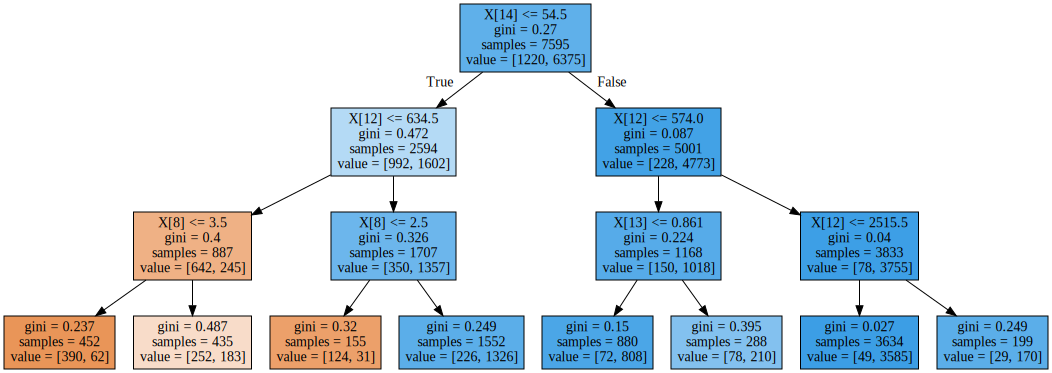

In [24]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)